 **Atividade 2.3 (Exercício 1 e 2) - Hamilton Celerino da Fonseca Neto**

# Imports e função auxiliar

In [12]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris


In [13]:
torch.manual_seed(1234)

def print_assert(r):
    if r:
        return 'OK!'
    else:
        return 'Incorreto!'


# Carregar dados e variáveis

In [14]:
iris = load_iris()
data = iris.data[iris.target==1, ::2]

x_in = data[:, 0:1]
y_in = data[:, 1:2]

# Converter para tensores FloatTensor do PyTorch
x_train = torch.FloatTensor(x_in)
y_train = torch.FloatTensor(y_in)

n_samples = x_train.size(0)

print('x_train.shape:', x_train.shape, type(x_train))
print('y_train.shape:', y_train.shape, type(y_train))

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])


x_train.shape: torch.Size([50, 1]) <class 'torch.Tensor'>
y_train.shape: torch.Size([50, 1]) <class 'torch.Tensor'>
x_train[:5]:
 tensor([[7.0000],
        [6.4000],
        [6.9000],
        [5.5000],
        [6.5000]])
y_train[:5]:
 tensor([[4.7000],
        [4.5000],
        [4.9000],
        [4.0000],
        [4.6000]])


In [15]:
iris_pd = pd.DataFrame(x_in, columns=['x_in'])
iris_pd['y_in'] = y_in
iris_pd.head()

,x_in,y_in
0,7.0,4.7
1,6.4,4.5
2,6.9,4.9
3,5.5,4.0
4,6.5,4.6


# Normalização

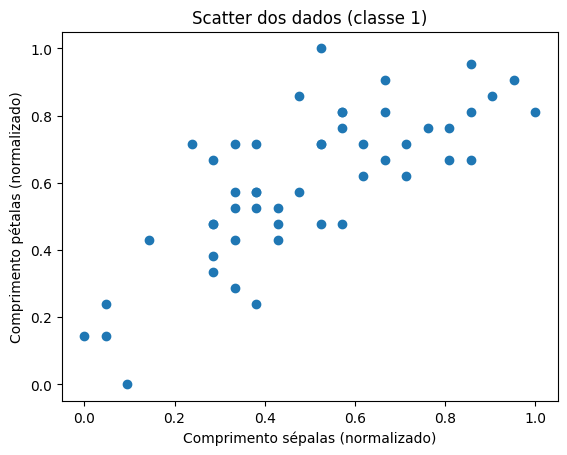

In [16]:
x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()

plt.scatter(x_train.numpy(), y_train.numpy())
plt.xlabel('Comprimento sépalas (normalizado)')
plt.ylabel('Comprimento pétalas (normalizado)')
plt.title('Scatter dos dados (classe 1)')
plt.show()


# Exercício 1 - Resposta

In [17]:
# Criação do x_train_bias

# Coluna com 1s com mesmo número de linhas de x_train
ones = torch.ones((n_samples, 1))

# Concatenar a coluna de 1s (bias) com x_train ao longo da dimensão das colunas
x_train_bias = torch.cat([ones, x_train], dim=1)

# Exibir as 5 primeiras linhas para verificação rápida
x_train_bias[:5]


tensor([[1.0000, 1.0000],
        [1.0000, 0.7143],
        [1.0000, 0.9524],
        [1.0000, 0.2857],
        [1.0000, 0.7619]])

# Verificação

In [18]:
# Verificação do exercício - Execute para testar sua implementação

print('x_train_bias é um tensor: {}'.format(print_assert(
    isinstance(x_train_bias, torch.FloatTensor)
)))

print('tamanho do x_train_bias: {}'.format(print_assert(
    x_train_bias.size() == torch.Size([50, 2])
)))

print('primeira coluna é só de uns: {}'.format(print_assert(
    (x_train_bias[:, 0] - torch.ones(n_samples)).sum() == 0
)))

print('segunda coluna é igual a x_train: {}'.format(print_assert(
    (x_train_bias[:, 1] - x_train.reshape(50)).sum() == 0
)))


x_train_bias é um tensor: OK!
tamanho do x_train_bias: OK!
primeira coluna é só de uns: OK!
segunda coluna é igual a x_train: OK!


# Treinamento (Exercício 2)


In [20]:
class Net():
    def __init__(self, n_in, n_out):
        self.w = torch.Tensor(n_out, n_in)
        self.w.uniform_(-0.1,0.1) # inicialização dos parâmetros

    def forward(self, x_bias):
        return x_bias.matmul(torch.t(self.w))

model = Net(2,1)

In [21]:
num_epochs = 100
learning_rate = 0.5
for epoch in range(num_epochs):

    # forward - predict
    y_pred = model.forward(x_train_bias)

    # loss - cálculo da função de perda (MSE)
    loss = torch.mean((y_pred - y_train) ** 2)

    # cálculo do gradiente pelas derivadas parciais
    w_grad = (2.0 / n_samples) * x_train_bias.t().matmul(y_pred - y_train)

    # gradiente descendente
    model.w = model.w - learning_rate * w_grad.t()

    # verbose
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss))


Epoch[20/100], loss: 0.022786
Epoch[40/100], loss: 0.021403
Epoch[60/100], loss: 0.021203
Epoch[80/100], loss: 0.021174
Epoch[100/100], loss: 0.021170


# Avaliação

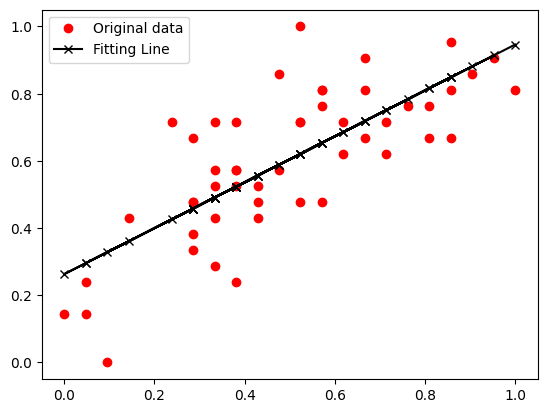

In [22]:
y_pred = model.forward(x_train_bias)

plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), y_pred.detach().numpy(), 'kx-', label='Fitting Line')
plt.legend()
plt.show()

# Parâmetro Treinado

In [26]:
print(model.w)

tensor([[0.2630, 0.6832]])


In [28]:
x_bias = x_train_bias
y = y_train
w_opt = (torch.inverse(x_bias.t().mm(x_bias)).mm(x_bias.t())).mm(y)
print(w_opt.t())

tensor([[0.2613, 0.6865]])
